# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [34]:
import pandas as pd
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
student_data = pd.DataFrame(
    {
        'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30],
        'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]
    }
)

Draw a dispersion diagram (scatter plot) for the data.

<AxesSubplot:xlabel='Age', ylabel='Tardies'>

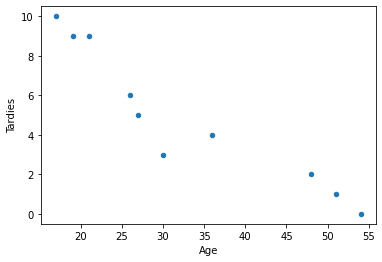

In [4]:
student_data.plot.scatter(x = 'Age', y = 'Tardies')

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [2]:
# As Age increases, Tardies dismishes, i.e. the older, the less often late (or the younger, the more often late).

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [8]:
student_data.corr() # Correlation is -0.94
np.cov(student_data.Age, student_data.Tardies)[0][1] # Covariance is -45.57
# Covariance measures how much a variable changes when the other variable changes.
# Correlation measures how strong both variables are linked.
# Both values are negative, i.e. as Age increases, Tardies disminishes.
# Correlation is close to 1 (in absolute value), denoting strong link / correlation.

-45.56666666666667

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [21]:
slope, intercept, r_value, p_value, std_err = linregress(student_data.Age, student_data.Tardies)
slope, intercept, r_value**2, p_value, std_err

(-0.24282077091598084,
 12.88880336313577,
 0.8820265558250112,
 5.56665383455336e-05,
 0.03139728816158602)

Plot your regression model on your scatter plot.

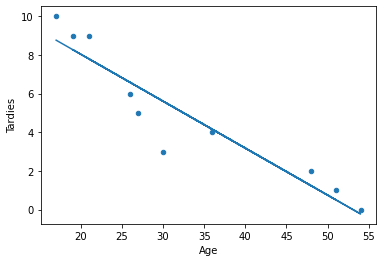

In [20]:
student_data.plot.scatter(x = 'Age', y = 'Tardies')
plt.plot(student_data.Age, slope * student_data.Age + intercept)
plt.show()

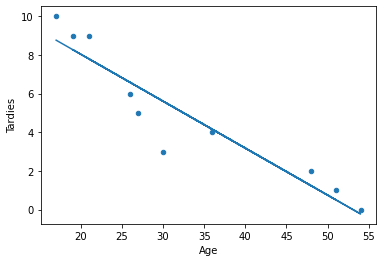

-0.24282077091598078 12.888803363135764


In [17]:
# With numpy: Least squares polynomial fit.
slope, intercept = np.polyfit(x = student_data.Age, y = student_data.Tardies, deg = 1) # polynomial of degree 1
student_data.plot.scatter(x = 'Age', y = 'Tardies')
plt.plot(student_data.Age, slope * student_data.Age + intercept)
plt.show()
print(slope, intercept)

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [3]:
# The results confirm our intuition that the younger, the more often late.
# The model is quite strong: R^2 is high (88% of the variation of Tardies is explained by the variation of Age)
# and p-value is very small, meaning that the slope is significantly different from 0.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [23]:
vehicles = pd.read_csv('vehicles.csv')
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [33]:
indep_variables = ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']
dep_variable = ['CO2 Emission Grams/Mile']
all_variables = indep_variables + dep_variable

vehicles_subset = vehicles[all_variables]
vehicles_subset.corr()[dep_variable]

# The most important variables in determining CO2 emissions are those with the higher correlation in absolute value, i.e.
# Fuel Barrels/Year, Fuel Cost/Year, Combined MPG

,CO2 Emission Grams/Mile
Year,-0.222300
Cylinders,0.752393
Fuel Barrels/Year,0.986189
Combined MPG,-0.926229
Fuel Cost/Year,0.930865
CO2 Emission Grams/Mile,1.000000


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [35]:
indep_variables_subset = ['Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']
# Linear regression (OLS) with multiple variables

X = sm.add_constant(vehicles[indep_variables_subset])
Y = vehicles[dep_variable]

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [36]:
print_model = model.summary()
print(print_model)

# Strong model, R-squared and Adjusted R-squared of 98%
# All variables have p-value of almost 0, meaning that the slope is significantly different from 0.
# There is strong multicollinearity, probably between Fuel Barrels/Year and Fuel Cost/Year, let's drop the latest

                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.980
Model:                                 OLS   Adj. R-squared:                  0.980
Method:                      Least Squares   F-statistic:                 5.932e+05
Date:                     Thu, 24 Mar 2022   Prob (F-statistic):               0.00
Time:                             16:18:46   Log-Likelihood:            -1.5235e+05
No. Observations:                    35952   AIC:                         3.047e+05
Df Residuals:                        35948   BIC:                         3.047e+05
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

In [37]:
indep_variables_subset = ['Fuel Barrels/Year', 'Combined MPG']
# Linear regression (OLS) with multiple variables

X = sm.add_constant(vehicles[indep_variables_subset])
Y = vehicles[dep_variable]

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

print_model = model.summary()
print(print_model)

# Almost no change of R-squared and no multi collinearity anymore: better model (simpler).

                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.977
Model:                                 OLS   Adj. R-squared:                  0.977
Method:                      Least Squares   F-statistic:                 7.796e+05
Date:                     Thu, 24 Mar 2022   Prob (F-statistic):               0.00
Time:                             16:24:59   Log-Likelihood:            -1.5467e+05
No. Observations:                    35952   AIC:                         3.094e+05
Df Residuals:                        35949   BIC:                         3.094e+05
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [44]:
parties = pd.DataFrame(
    {
        'X': [1,3,4,6,8,9,11,14],
        'Y': [1,2,4,4,5,7,8,13]
    }
)

parties

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

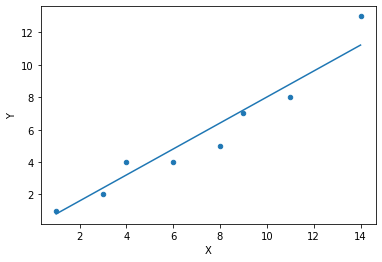

In [56]:
parties.plot.scatter(x = 'X', y = 'Y')


# no need to add_constant as we want intercept of 0 (if nobody is invited, nobody comes!)
model = sm.OLS(parties.Y, parties.X).fit()
results = model.params


plt.plot(parties.X, results.X * parties.X)



What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [57]:
# We see that the regression line looks quite close to the observations, except the last one.
# Most of the observations points are below the regression line due to the outlier.
# Also, the slope is positive, i.e. the more people I invite, the more people come, which is logical.
# However, the slopes seems less than 1, so the more people I invite, the less come (but stable in proportion).

print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.979
Model:                            OLS   Adj. R-squared (uncentered):              0.976
Method:                 Least Squares   F-statistic:                              320.2
Date:                Thu, 24 Mar 2022   Prob (F-statistic):                    4.20e-07
Time:                        16:43:31   Log-Likelihood:                         -11.017
No. Observations:                   8   AIC:                                      24.03
Df Residuals:                       7   BIC:                                      24.11
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/Users/ericmartinet/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

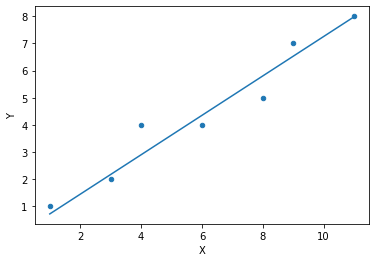

                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              449.6
Date:                Thu, 24 Mar 2022   Prob (F-statistic):                    7.18e-07
Time:                        16:46:25   Log-Likelihood:                         -6.0445
No. Observations:                   7   AIC:                                      14.09
Df Residuals:                       6   BIC:                                      14.03
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/Users/ericmartinet/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [62]:
parties_cleaned = parties.drop(7)

parties_cleaned.plot.scatter(x = 'X', y = 'Y')

# no need to add_constant as we want intercept of 0 (if nobody is invited, nobody comes!)
model = sm.OLS(parties_cleaned.Y, parties_cleaned.X).fit()
results = model.params

plt.plot(parties_cleaned.X, results.X * parties_cleaned.X)
plt.show()

print_model = model.summary()
print(print_model)

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# R-squared is higher.
# Without the problematic point, the regression line is closer to the observations, which are on both sides of the line.
# The slope is also inferior in the second model.